In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy import sparse
from scipy.sparse.linalg import spsolve

# Problemas 2D

## Diferencias finitas

**Ejercicio 1**

Resolver numericamente el siguiente problema eliptico:

 $-\Delta u = f,\ en\  \Omega = (0,1)x(0,1)$
 
 
 u|<sub> $\partial\Omega$</sub> = 0
 
 donde $f(x,y) = 2\pi$<sup>2</sup>$sin(\pi x)sin(\pi y)$ utilizando $h = \frac{1}{5*2^N}, \   N = 0,1,...,5$
 
 Calcular en cada acaso el error obtenido
 
 La solucion del problema es $u(x,y) = sin(\pi x)sin(\pi y)$

In [6]:
def diffinitas2D(a, b, c, d, h, pcf, nu, alfa):
    
    Nx = int((b-a)/h)
    Ny = int((d-c)/h)
    dim = (Nx-1)*(Ny-1)
    xmesh = np.linspace(a,b,Nx+1)
    ymesh = np.linspace(c,d,Ny+1)
    
    p = np.ones(dim-1)
    
    for i in np.arange(1,dim-1):
        if np.mod(i,Ny-1)==0:
            p[i-1]=0
    
    
    A1 = sparse.coo_matrix((-4*np.ones(dim),(np.arange(0,dim),np.arange(0,dim))))
    A2 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(0,dim-Ny+1),np.arange(Ny-1,dim))),shape=(dim,dim))
    A3 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(Ny-1,dim),np.arange(0,dim-Ny+1))),shape=(dim,dim))
    A4 = sparse.coo_matrix((p,(np.arange(0,dim-1),np.arange(1,dim))),shape=(dim,dim))
    A5 = sparse.coo_matrix((p,(np.arange(1,dim),np.arange(0,dim-1))),shape=(dim,dim))
    A = A1+A2+A3+A4+A5

    A = -A/h**2
    A = A.tocsr()

    U, V = np.meshgrid(xmesh[1:-1],ymesh[1:-1])
    f = np.array(pcf(np.ravel(U),np.ravel(V)))
    uh = spsolve(A,np.reshape(f,dim))
    u = np.zeros([Nx+1,Ny+1])
    
    u[1:-1,1:-1] = np.reshape(uh,(Nx-1, Ny-1))
    
    return [xmesh, ymesh, u]

In [7]:
def fun(x,y):
    return 2*(math.pi**2)*np.sin(math.pi*x)*np.sin(math.pi*y)

def u_exacta(x,y):
    return np.sin(math.pi*x)*np.sin(math.pi*y)


In [8]:
def trapecio2D(f,h):
    return sum(sum(f))*h**2

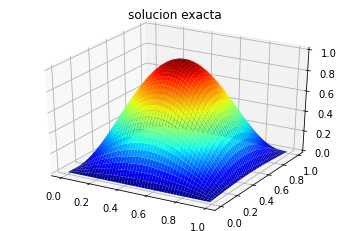

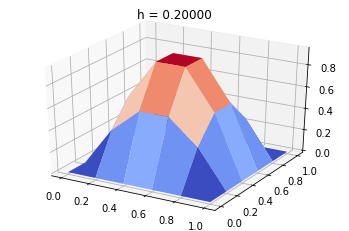

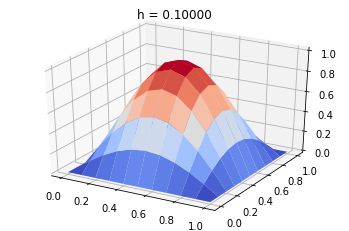

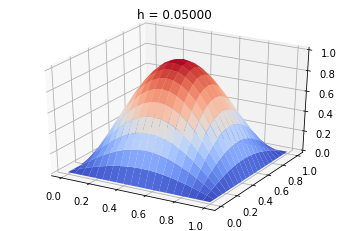

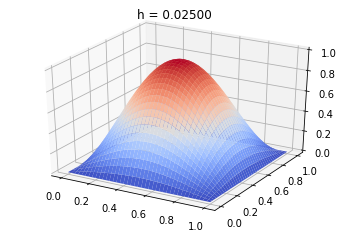

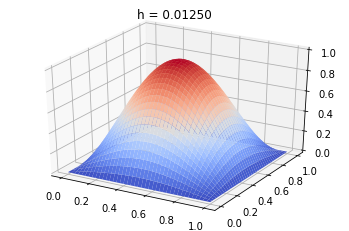

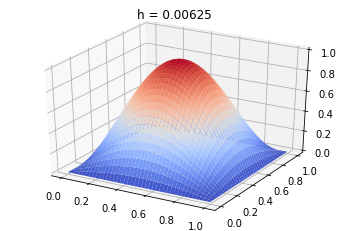

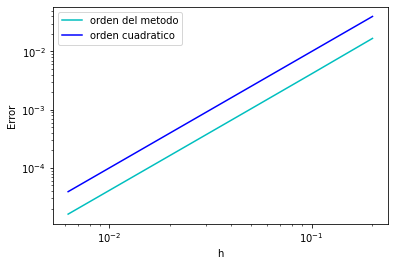

In [9]:
a=0; b=1; c=0; d=1;

x, y = np.meshgrid(np.arange(a,b,0.01),np.arange(c,d,0.01))
z = u_exacta(x,y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='jet')
plt.title('solucion exacta')
plt.show()

h=[]
error=[]
for k in range(0,6):
    
    h.append((1/2**(k))/5)
    
    [xmesh, ymesh, u] = diffinitas2D(a,b,c,d,h[k],fun,0,0)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(xmesh, ymesh)
    ax.plot_surface(X, Y, u, cmap=cm.coolwarm)
    plt.title('h = %.5f' %h[k])
    error.append(np.sqrt(trapecio2D((u-u_exacta(X,Y))**2,h[k])))
    plt.show()
    
plt.plot(h,error, color='c')
plt.plot(h,np.array(h)**2, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['orden del metodo', 'orden cuadratico'])
plt.show()
    
 

**Ejercicio 2**

Resolver numericamente el siguiente problema eliptico:

 $-\Delta u = f,\ en\  \Omega = (0,1)x(0,1)$
 
 
 u|<sub> $\partial\Omega$</sub> = 0
 
 utilizando $h = \frac{1}{5*2^N}, \   N = 0,1,...,5$
 
 Calcular en cada acaso el error obtenido:
 
 a) $f(x,y) = 32\pi$<sup>2</sup>$sin(4\pi x)sin(4\pi y)$
 
 
 La solucion del problema es $u(x,y) = sin(4\pi x)sin(4\pi y)$
 
 b) $f(x,y) = 116\pi$<sup>2</sup>$sin(10\pi x)sin(4\pi y)$
 
 La solucion del problema es $u(x,y) = sin(10\pi x)sin(4\pi y)$

In [10]:

def funa(x,y):
    return 32*math.pi**2*np.sin(4*math.pi*x)*np.sin(4*math.pi*y)


def funb(x,y):
    return 116*math.pi**2*np.sin(10*math.pi*x)*np.sin(4*math.pi*y)

def u_exacta1(x,y):
    return np.sin(4*math.pi*x)*np.sin(4*math.pi*y)

def u_exacta2(x,y):
    return np.sin(10*math.pi*x)*np.sin(4*math.pi*y)


Apartado a)

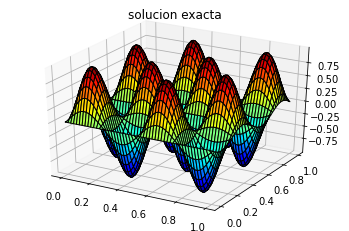

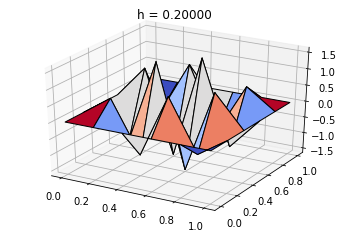

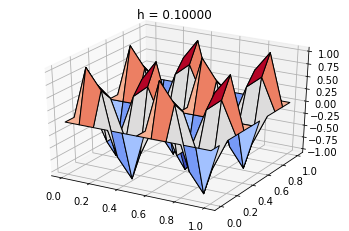

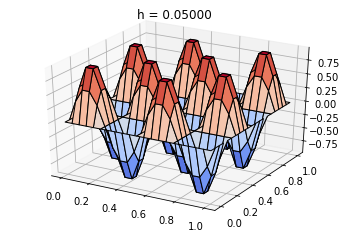

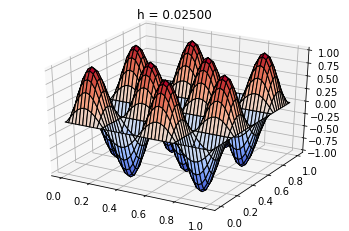

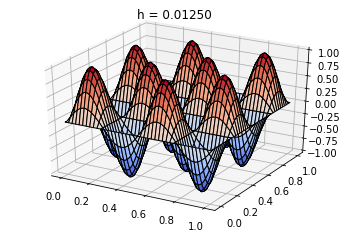

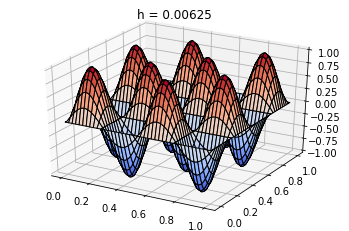

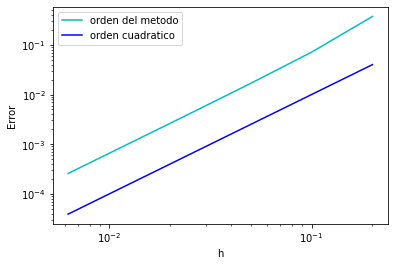

In [11]:
a=0; b=1; c=0; d=1;

x, y = np.meshgrid(np.arange(a,b,0.01),np.arange(c,d,0.01))
z = u_exacta1(x,y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='jet', edgecolor='black')
plt.title('solucion exacta')
plt.show()

h=[]
error=[]
for k in range(0,6):
    
    h.append((1/2**(k))/5)
    
    [xmesh, ymesh, u] = diffinitas2D(a,b,c,d,h[k],funa,0,0)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(xmesh, ymesh)
    ax.plot_surface(X, Y, u, cmap=cm.coolwarm, edgecolor='black')
    plt.title('h = %.5f' %h[k])
    error.append(np.sqrt(trapecio2D((u-u_exacta1(X,Y))**2,h[k])))
    plt.show()
    
plt.plot(h,error, color='c')
plt.xscale('log')
plt.yscale('log')
plt.plot(h,np.array(h)**2, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['orden del metodo', 'orden cuadratico'])
plt.show()

Apartado b)

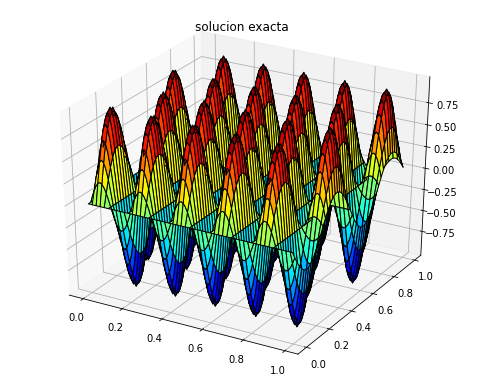

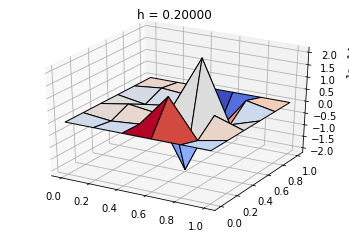

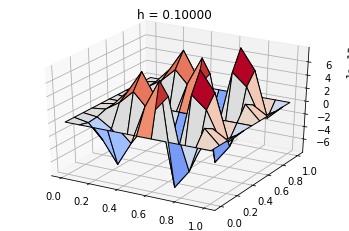

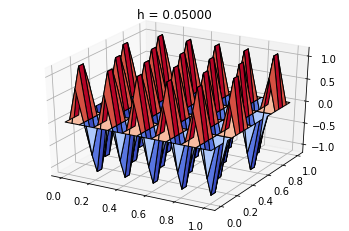

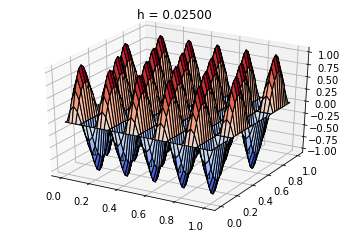

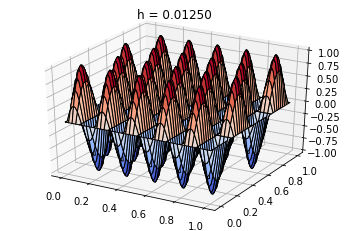

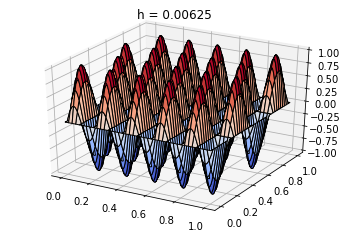

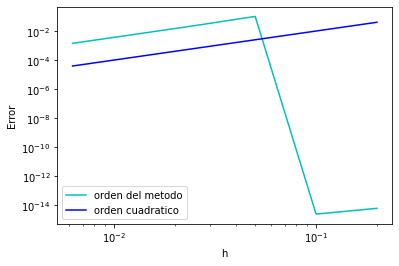

In [12]:
a=0; b=1; c=0; d=1;

x, y = np.meshgrid(np.arange(a,b,0.01),np.arange(c,d,0.01))
z = u_exacta2(x,y)

fig = plt.figure(figsize=[8.4,6.8])
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='jet', edgecolor='black')
plt.title('solucion exacta')
plt.show()

h=[]
error=[]
for k in range(0,6):
    
    h.append((1/2**(k))/5)
    
    [xmesh, ymesh, u] = diffinitas2D(a,b,c,d,h[k],funb,0,0)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(xmesh, ymesh)
    ax.plot_surface(X, Y, u, cmap=cm.coolwarm, edgecolor='black')
    plt.title('h = %.5f' %h[k])
    error.append(np.sqrt(trapecio2D((u-u_exacta2(X,Y))**2,h[k])))
    plt.show()
    
plt.plot(h,error, color='c')
plt.xscale('log')
plt.yscale('log')
plt.plot(h,np.array(h)**2, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend(['orden del metodo', 'orden cuadratico'])
plt.show()

**Ejercicio 3**

Encontrar la superficie mínima sobre el cuadrado unidad de tal forma que sobre $[0,1]*{0}\  y \ [0,1]*{1}$ la superficie quede descrita por la funcion $g(x) = sin(\pi x)$ mientras que sobre ${0}*[0,1] \ y \ {1}*[0,1]$ queda descrita por $h(y)=0$. Resolver el problema numericamente  utilizando $h = \frac{1}{5*2^N}, \   N = 0,1,...,5$

In [13]:
def diffinitas2D1(a, b, c, d, h, pcf, nu, alfa, fung):
    
    Nx = int((b-a)/h)
    Ny = int((d-c)/h)
    dim = (Nx-1)*(Ny-1)
    xmesh = np.linspace(a,b,Nx+1)
    ymesh = np.linspace(c,d,Ny+1)
    
    p = np.ones(dim-1)
    
    for i in np.arange(1,dim-1):
        if np.mod(i,Ny-1)==0:
            p[i-1]=0
    
    
    A1 = sparse.coo_matrix((-4*np.ones(dim),(np.arange(0,dim),np.arange(0,dim))))
    A2 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(0,dim-Ny+1),np.arange(Ny-1,dim))),shape=(dim,dim))
    A3 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(Ny-1,dim),np.arange(0,dim-Ny+1))),shape=(dim,dim))
    A4 = sparse.coo_matrix((p,(np.arange(0,dim-1),np.arange(1,dim))),shape=(dim,dim))
    A5 = sparse.coo_matrix((p,(np.arange(1,dim),np.arange(0,dim-1))),shape=(dim,dim))
    A = A1+A2+A3+A4+A5

    A = -A/h**2
    A = A.tocsr()
    
    U, V = np.meshgrid(xmesh[1:-1],ymesh[1:-1])
    f = np.array(pcf(np.ravel(U),np.ravel(V)))
    f = np.reshape(f,dim)
    g = fung(xmesh)
    bd = np.zeros(f.shape)
    bd[np.arange(0,len(bd),Ny-1)]= g[1:-1]
    bd[np.arange(Ny-2, len(bd), Ny-1)] = g[1:-1]
    bd = bd/h**2
    uh = spsolve(A,np.reshape(f+bd,dim))
    u = np.zeros([Nx+1,Ny+1])
    u[0,:] = g
    u[-1,:] = g
    u[1:-1,1:-1] = np.reshape(uh,(Nx-1, Ny-1)).transpose()

    return [xmesh, ymesh, u]

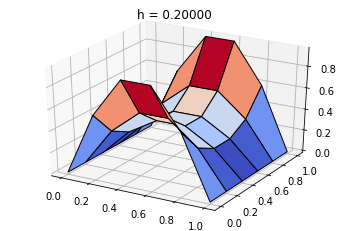

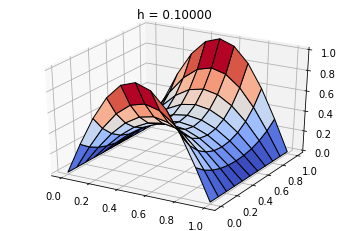

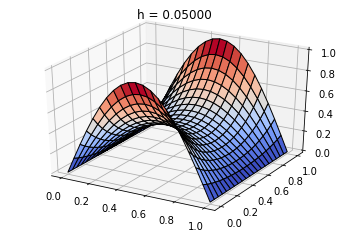

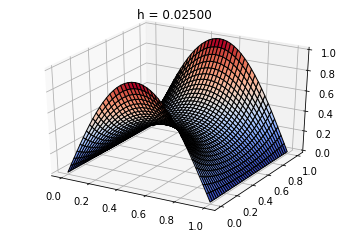

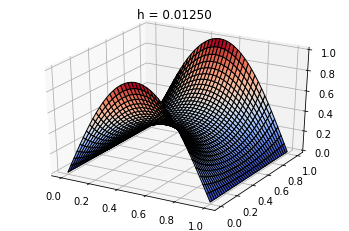

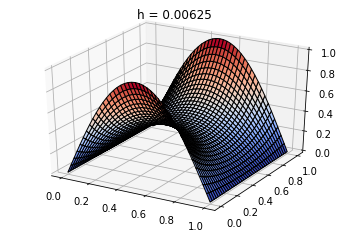

In [14]:
a=0; b=1; c=0; d=1;

def g(x):
    return np.sin(math.pi*x)

def f(x,y):
    return np.zeros(len(x))


h=[]
for k in range(0,6):
    
    h.append((1/2**(k))/5)
    
    [xmesh, ymesh, u] = diffinitas2D1(a,b,c,d,h[k],f,0,0,g)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(xmesh, ymesh)
    ax.plot_surface(X, Y, u, cmap=cm.coolwarm, edgecolor='black')
    plt.title('h = %.5f' %h[k])
    plt.show()
    

**Ejercicio 4**

Resolver numericamente el siguiente problema eliptico:

$u - \nu \Delta u = f,\ en \ \Omega = (0,1)*(0,1)$

u|<sub> $\partial\Omega$</sub> = 0

donde $f(x,y) = 1$ para $\nu $= 1, 10<sup>-1</sup>,...,10<sup>-7</sup>


In [15]:
def diffinitas2D2(a, b, c, d, h, pcf, nu, alfa):
    
    Nx = int((b-a)/h)
    Ny = int((d-c)/h)
    dim = (Nx-1)*(Ny-1)
    xmesh = np.linspace(a,b,Nx+1)
    ymesh = np.linspace(c,d,Ny+1)
    
    p = np.ones(dim-1)
    
    for i in np.arange(1,dim-1):
        if np.mod(i,Ny-1)==0:
            p[i-1]=0
    
    
    A1 = sparse.coo_matrix((-4*np.ones(dim),(np.arange(0,dim),np.arange(0,dim))))
    A2 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(0,dim-Ny+1),np.arange(Ny-1,dim))),shape=(dim,dim))
    A3 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(Ny-1,dim),np.arange(0,dim-Ny+1))),shape=(dim,dim))
    A4 = sparse.coo_matrix((p,(np.arange(0,dim-1),np.arange(1,dim))),shape=(dim,dim))
    A5 = sparse.coo_matrix((p,(np.arange(1,dim),np.arange(0,dim-1))),shape=(dim,dim))
    A = A1+A2+A3+A4+A5

    A = -A/h**2
    A = A + sparse.coo_matrix((alfa*np.ones(dim)/nu,(np.arange(0,dim), np.arange(0,dim))))
    A = A.tocsr()

    U, V = np.meshgrid(xmesh[1:-1],ymesh[1:-1])
    f = np.array(pcf(np.ravel(U),np.ravel(V)))
    uh = spsolve(A,np.reshape(f/nu,dim))
    u = np.zeros([Ny+1,Nx+1])
    
    u[1:-1,1:-1] = np.reshape(uh,(Ny-1, Nx-1))
    
    return [xmesh, ymesh, u]

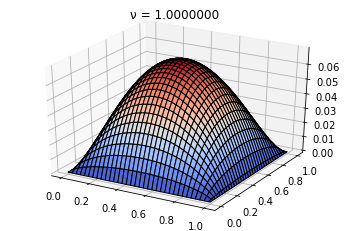

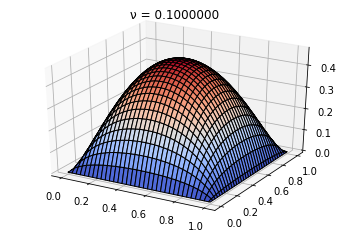

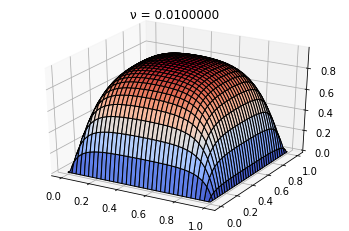

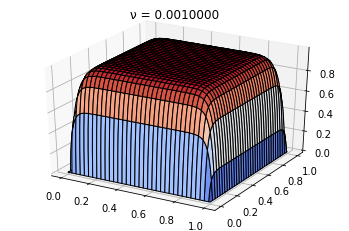

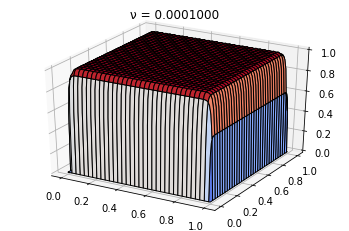

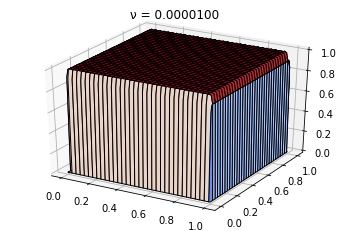

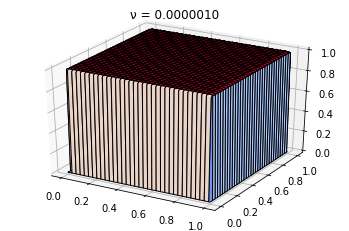

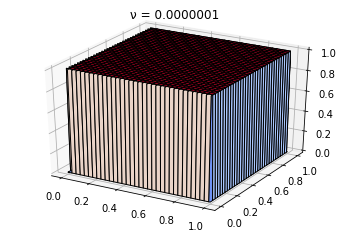

In [16]:
a=0; b=1; c=0; d=1;

def f(x,y):
    return np.ones(len(x))

alfa=1
h=1/100
nu=[]
for k in range(0,8):
    
    nu.append(1/10**k)
    
    [xmesh, ymesh, u] = diffinitas2D2(a,b,c,d,h,f,nu[k],alfa)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(xmesh, ymesh)
    ax.plot_surface(X, Y, u, cmap=cm.coolwarm, edgecolor='black')
    plt.title('\u03BD = %.7f' %nu[k])
    plt.show()

**Ejercicio 5**

Resolver numericamente el siguiente problema eliptico:

$-\Delta u = f \ en \ \Omega = (0,1)*(0,1)$

$u(0,y) = arctan$(M(y<sup>2</sup> - $\frac {1}{4}))$

$u(1,y) = arctan$(M(y<sup>2</sup> + $\frac {3}{4}))$

$u(x,0) = arctan$(M(x<sup>2</sup> - $\frac {1}{4}))$

$u(x,1) = arctan$(M(x<sup>2</sup> + $\frac {3}{4}))$

donde $f(x,y)$ = -4M*(1-M<sup>2</sup>r(x,y)(x<sup>2</sup>+y<sup>2</sup>+$\frac{1}{4}$))/(1+M<sup>2</sup>r(x,y)<sup>2</sup>)<sup>2</sup>

donde $r(x,y)$ = x<sup>2</sup>+y<sup>2</sup> -$\frac{1}{4}$, para M = 50 y M = 500

In [28]:
def diffinitas2D3(a, b, c, d, h, pcf, fun1, fun2, fun3, fun4):
    
    Nx = int((b-a)/h)
    Ny = int((d-c)/h)
    dim = (Nx-1)*(Ny-1)
    xmesh = np.linspace(a,b,Nx+1)
    ymesh = np.linspace(c,d,Ny+1)
    
    p = np.ones(dim-1)
    
    for i in np.arange(1,dim-1):
        if np.mod(i,Ny-1)==0:
            p[i-1]=0
    
    
    A1 = sparse.coo_matrix((-4*np.ones(dim),(np.arange(0,dim),np.arange(0,dim))))
    A2 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(0,dim-Ny+1),np.arange(Ny-1,dim))),shape=(dim,dim))
    A3 = sparse.coo_matrix((np.ones(dim-Ny+1),(np.arange(Ny-1,dim),np.arange(0,dim-Ny+1))),shape=(dim,dim))
    A4 = sparse.coo_matrix((p,(np.arange(0,dim-1),np.arange(1,dim))),shape=(dim,dim))
    A5 = sparse.coo_matrix((p,(np.arange(1,dim),np.arange(0,dim-1))),shape=(dim,dim))
    A = A1+A2+A3+A4+A5

    A = -A/h**2
    A = A.tocsr()

    U, V = np.meshgrid(xmesh[1:-1],ymesh[1:-1])
    f = np.array(pcf(np.ravel(U),np.ravel(V)))
    f = np.reshape(f,dim)
    
    g1=fun1(ymesh)
    g2=fun2(ymesh)
    g3=fun3(xmesh)
    g4=fun4(xmesh)

    b1=np.zeros(f.shape)
    b2=np.zeros(f.shape)
    b3=np.zeros(f.shape)
    b4=np.zeros(f.shape)

    b1[0:Ny-1]=g1[1:-1]
    b2[len(b2)-Ny+1:len(b2)]=g2[1:-1]
    b3[np.arange(0,len(b3),Ny-1)]=g3[1:-1]
    b4[np.arange(Ny-2,len(b4),Ny-1)]=g4[1:-1] 
    bd=(b1+b2+b3+b4)/h**2
    
    uh = spsolve(A,np.reshape(f+bd,dim))
    u = np.zeros([Ny+1,Nx+1])
    u[0,:]=g3
    u[-1,:]=g4
    u[:,0]=g1
    u[:,-1]=g2
    
    u[1:-1,1:-1] = np.reshape(uh,(Ny-1, Nx-1))
    
    return [xmesh, ymesh, u]

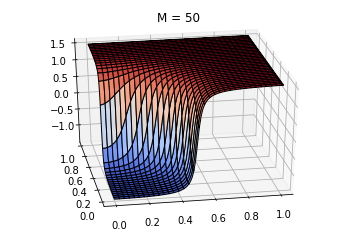

In [52]:
a=0; b=1; c=0; d=1;
h=1/100

def r(x,y):
    return x**2+y**2-1/4

def f(x,y):
    return -4*50*(1-2500*r(x,y)*(x**2+y**2+1/4))/(1+2500*r(x,y)**2)**2

def g1(y):
    return np.arctan(50*(y**2-1/4))
def g2(y):
    return np.arctan(50*(y**2+3/4))
def g3(x):
    return np.arctan(50*(x**2-1/4))
def g4(x):
    return np.arctan(50*(x**2+3/4))
   
    
[xmesh, ymesh, u] = diffinitas2D3(a,b,c,d,h,f,g1,g2,g3,g4)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xmesh, ymesh)
ax.plot_surface(X, Y, u, cmap=cm.coolwarm, edgecolor='black')
plt.title('M = 50')
ax.view_init(30,260)
plt.show()

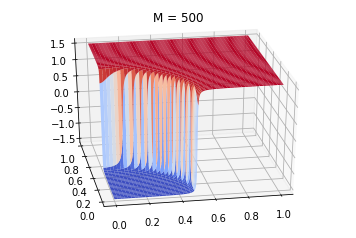

In [55]:
a=0; b=1; c=0; d=1;

h=1/1000

def r(x,y):
    return x**2+y**2-1/4

def f(x,y):
    return -4*500*(1-250000*r(x,y)*(x**2+y**2+1/4))/(1+250000*r(x,y)**2)**2

def g1(y):
    return np.arctan(500*(y**2-1/4))
def g2(y):
    return np.arctan(500*(y**2+3/4))
def g3(x):
    return np.arctan(500*(x**2-1/4))
def g4(x):
    return np.arctan(500*(x**2+3/4))
   
    
[xmesh, ymesh, u] = diffinitas2D3(a,b,c,d,h,f,g1,g2,g3,g4)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xmesh, ymesh)
ax.plot_surface(X, Y, u, cmap=cm.coolwarm)
plt.title('M = 500')
ax.view_init(30,260)
plt.show()